In [22]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/disaster_location_data/pend-gdis-1960-2018-disasterlocations-csv/pend-gdis-1960-2018-disasterlocations.csv')


In [16]:
loc_df=df['geolocation'].value_counts().rename_axis('locations').reset_index(name='counts')

In [17]:
loc_df

,locations,counts
0,Texas,161
1,Guangdong,149
2,Sichuan,147
3,Yunnan,120
4,Missouri,118
...,...,...
9869,Mehran,1
9870,Amol,1
9871,Mamuju Utara,1
9872,Sigi,1


<AxesSubplot:xlabel='locations', ylabel='counts'>

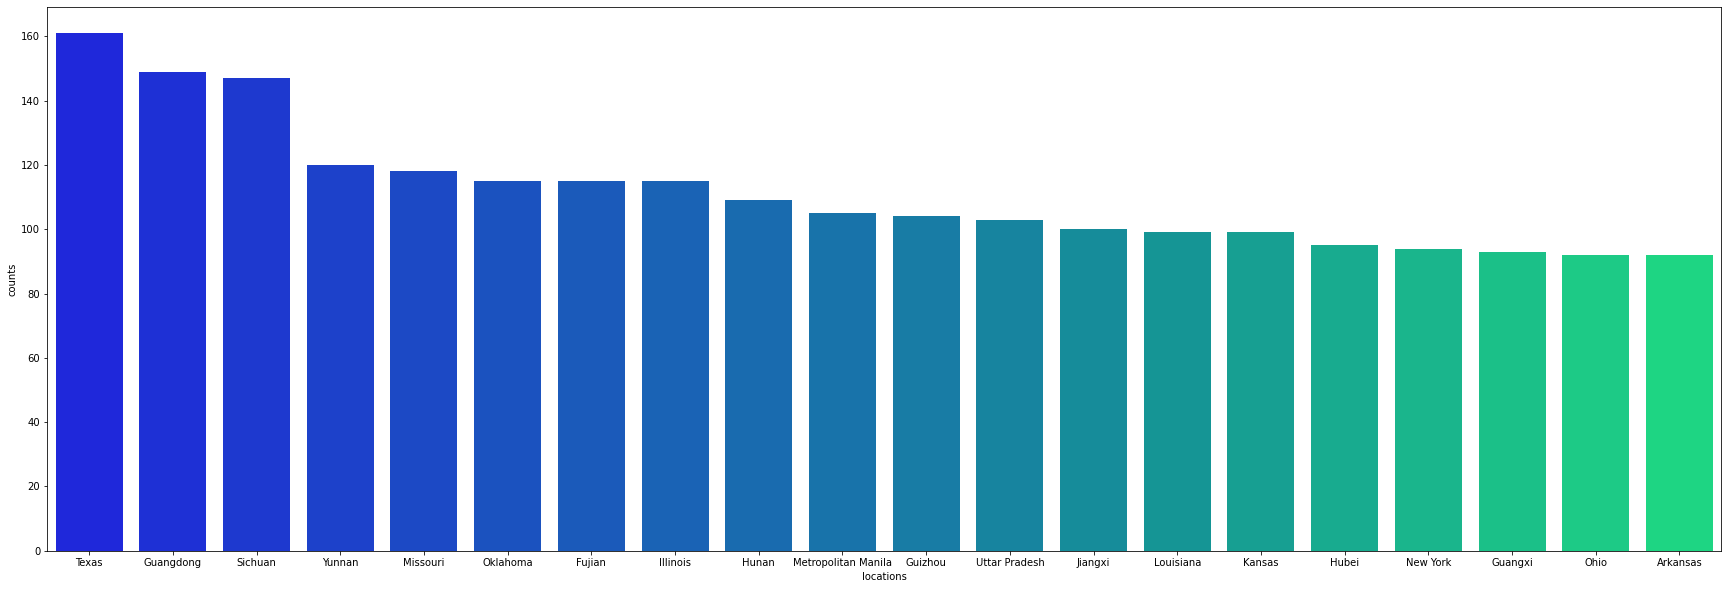

In [20]:
fig = plt.figure(1, figsize = (30,10))
sns.barplot(x = 'locations', y = 'counts', data = loc_df.nlargest(20, 'counts'), palette = 'winter')
# plt.xticks(rotation=45)

In [23]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

<AxesSubplot:>

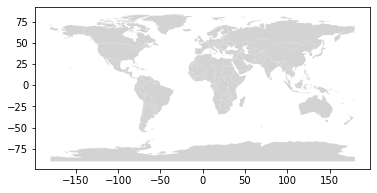

In [24]:
countries.plot(color="lightgrey")

In [25]:
df.head()

,id,country,iso3,gwno,year,geo_id,geolocation,level,adm1,adm2,adm3,location,historical,hist_country,disastertype,disasterno,latitude,longitude
0,109,Albania,ALB,339.0,2009,346,Ana E Malit,3,Shkoder,Shkodres,Ana E Malit,Ana E Malit,0,NaN,flood,2009-0631,42.020948,19.418317
1,109,Albania,ALB,339.0,2009,351,Bushat,3,Shkoder,Shkodres,Bushat,Bushat,0,NaN,flood,2009-0631,41.959294,19.514309
2,175,Angola,AGO,540.0,2001,760,Onjiva,3,Cunene,Cuanhama,Onjiva,Onjiva,0,NaN,flood,2001-0146,-17.093484,15.665758
3,187,Angola,AGO,540.0,2009,710,Evale,3,Cunene,Cuanhama,Evale,Evale,0,NaN,flood,2009-0092,-16.531533,15.773987
4,187,Angola,AGO,540.0,2009,749,Mupa,3,Cunene,Cuvelai,Mupa,Mupa,0,NaN,flood,2009-0092,-16.200065,15.844189


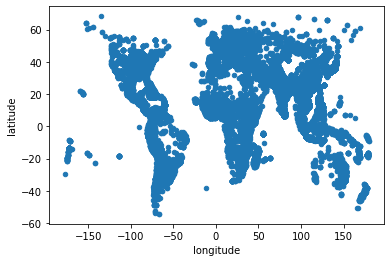

In [26]:
df.plot(x="longitude", y="latitude", kind="scatter", colormap="YlOrRd")
plt.show()

In [35]:
df['disastertype'].value_counts()

flood                   17347
storm                   12323
extreme temperature      3506
drought                  2938
earthquake               2403
landslide                 982
volcanic activity         405
mass movement (dry)        49
Name: disastertype, dtype: int64

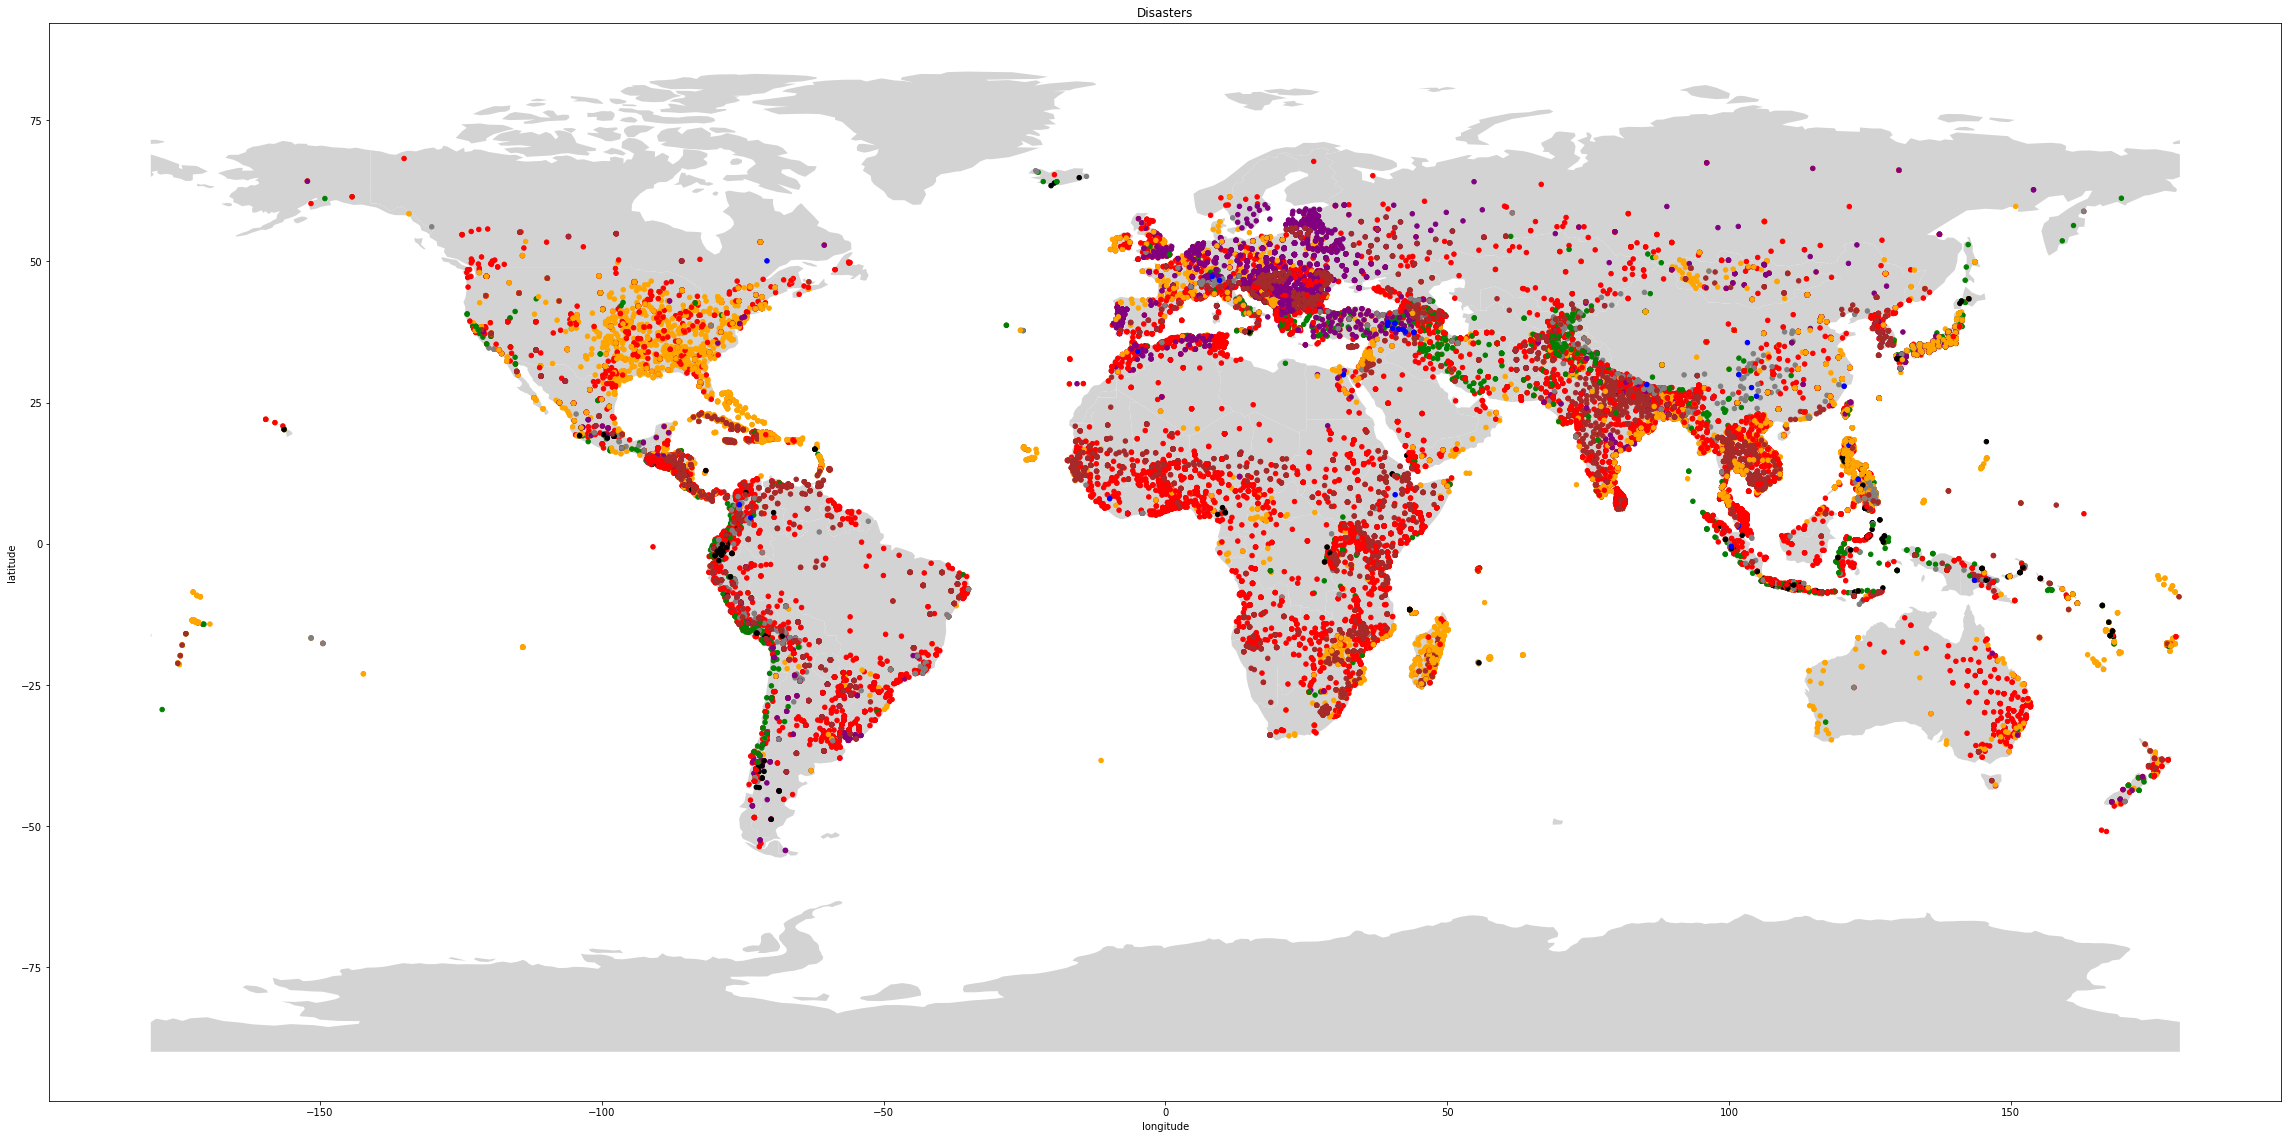

In [37]:
colors = {"flood": "red", "storm": "orange", "extreme temperature ": "purple", "drought": "brown",
"earthquake": "green", "landslide": "gray", "volcanic activity": "black", "mass movement (dry)": "blue"}



df["color"] = df["disastertype"].apply(lambda x: colors[x])

# create the scatter plot
fig, ax = plt.subplots(figsize=(40,30))


countries.plot(color="lightgrey", ax=ax)
df.plot(x="longitude", y="latitude", kind="scatter", c=df["color"], title="Disasters", ax=ax)
plt.show()






In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X = df[["latitude", "longitude"]]
y = df["disastertype"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

new_data = [[42.020948, 19.418317]]  
prediction = clf.predict(new_data)
print("Prediction:", prediction[0])

Accuracy: 0.6221999749718433
Prediction: flood


/Users/allupraveen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [40]:
df1 = pd.get_dummies(df, columns=["disastertype"])

In [41]:
df1

,id,country,iso3,gwno,year,geo_id,geolocation,level,adm1,adm2,...,color,date,disastertype_drought,disastertype_earthquake,disastertype_extreme temperature,disastertype_flood,disastertype_landslide,disastertype_mass movement (dry),disastertype_storm,disastertype_volcanic activity
0,109,Albania,ALB,339.0,2009,346,Ana E Malit,3,Shkoder,Shkodres,...,red,2009-01-01,0,0,0,1,0,0,0,0
1,109,Albania,ALB,339.0,2009,351,Bushat,3,Shkoder,Shkodres,...,red,2009-01-01,0,0,0,1,0,0,0,0
2,175,Angola,AGO,540.0,2001,760,Onjiva,3,Cunene,Cuanhama,...,red,2001-01-01,0,0,0,1,0,0,0,0
3,187,Angola,AGO,540.0,2009,710,Evale,3,Cunene,Cuanhama,...,red,2009-01-01,0,0,0,1,0,0,0,0
4,187,Angola,AGO,540.0,2009,749,Mupa,3,Cunene,Cuvelai,...,red,2009-01-01,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39948,Jun-94,Dominica,NaN,NaN,2015,45253,Saint Patrick,1,Saint Patrick,NaN,...,orange,2015-01-01,0,0,0,0,0,0,1,0
39949,Jun-94,Dominica,NaN,NaN,2015,45254,Saint Andrew,1,Saint Andrew,NaN,...,orange,2015-01-01,0,0,0,0,0,0,1,0
39950,Jun-94,Dominica,NaN,NaN,2015,45255,Saint George,1,Saint George,NaN,...,orange,2015-01-01,0,0,0,0,0,0,1,0
39951,Jun-94,Dominica,NaN,NaN,2015,45256,Saint David,1,Saint David,NaN,...,orange,2015-01-01,0,0,0,0,0,0,1,0


In [49]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime, timedelta
from sklearn.metrics import mean_absolute_error


feature_cols = ["latitude", "longitude", "disastertype_drought","disastertype_earthquake","disastertype_extreme temperature ","disastertype_flood","disastertype_landslide","disastertype_mass movement (dry)","disastertype_storm","disastertype_volcanic activity"]

df1["date"] = pd.to_datetime(df1["year"], format="%Y")


train_df, test_df = train_test_split(df1, test_size=0.2)


model = RandomForestRegressor(n_estimators=100)
model.fit(train_df[feature_cols], train_df["year"])

predictions = model.predict(test_df[feature_cols])

mae = mean_absolute_error(test_df["year"], predictions)
print("Mean absolute error:", mae)


Mean absolute error: 7.717731054253016


In [50]:
predictions

array([2006.66      , 2003.81333333, 1998.87065056, ..., 2004.29828294,
       2012.47578571, 2009.33000108])

In [54]:
test_df["year"]

62       2010
37753    2012
23393    2011
23454    2012
20336    1994
         ... 
11542    1997
8855     2016
23968    2000
8030     2017
8406     2005
Name: year, Length: 7991, dtype: int64

In [67]:
# from fbprophet import Prophet

# df2 = df.rename(columns={'disaster_type': 'event_type', 'date': 'ds'})

# future = pd.DataFrame({'ds': pd.date_range(start=df2['ds'].max(), periods=365)})

# grouped = df2.groupby(['latitude', 'longitude', 'event_type']).agg({'ds': 'min'}).reset_index()

# def predict_next_event(group):
#     m = Prophet()
#     m.fit(group)
#     forecast = m.predict(future)
#     return forecast.loc[forecast['yhat'].idxmin()]['ds']

# predictions = grouped.groupby(['latitude', 'longitude', 'event_type']).apply(predict_next_event).reset_index(name='next_event_date')


In [71]:
predictions

array([1.22125334e+18, 1.16377891e+18, 1.05415646e+18, ...,
       3.07349856e+17, 3.27336768e+17, 7.39965049e+17])